First 5 Rows:
    customer_id  credit_score country  gender   age  tenure    balance  \
0     15634602           619  France  Female  42.0       2       0.00   
1     15647311           608   Spain  Female  41.0       1   83807.86   
2     15619304           502  France  Female  42.0       8  159660.80   
3     15701354           699  France  Female  39.0       1       0.00   
4     15737888           850   Spain  Female  43.0       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1            1.0         101348.88      1  
1                1            0            1.0         112542.58      0  
2                3            1            0.0         113931.57      1  
3                2            0            0.0          93826.63      0  
4                1            1            1.0          79084.10      0  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data column

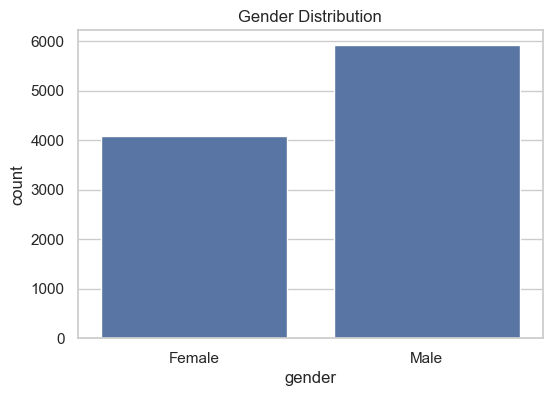

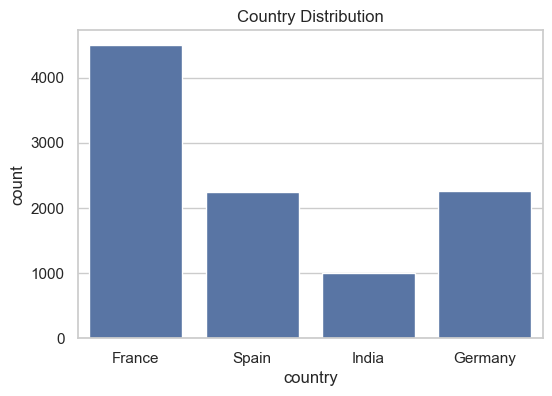

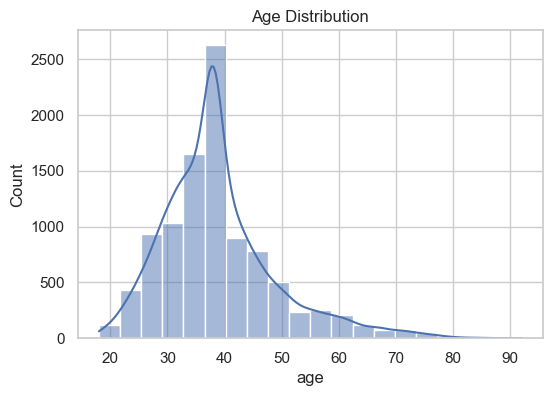

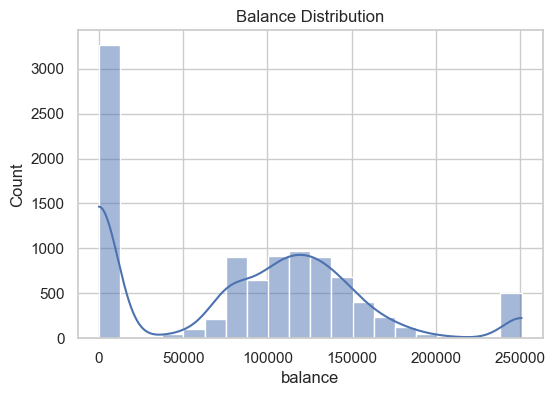

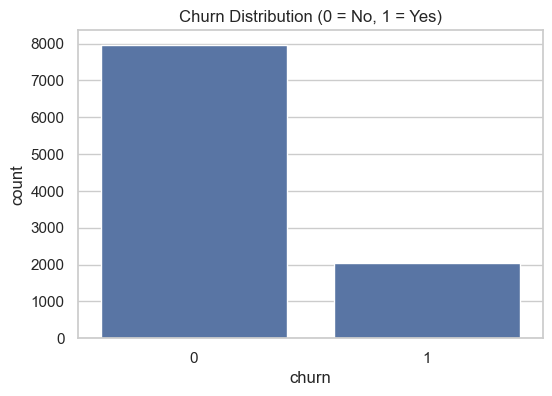


✅ Data Cleaning + EDA Completed Successfully!


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 1. Load the CSV File
# =========================
df = pd.read_csv(r"C:\Users\MAHESHWARI\OneDrive\Documents\project\Bank_Customer_Churn_(U).csv")
# =========================
# 2. Basic EDA
# =========================
print("First 5 Rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nStatistical Summary:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

# =========================
# 3. Data Cleaning
# =========================

# Fill missing Geography
df["country"] = df["country"].fillna("India")

# Gender handling
female_count = (df["gender"] == "Female").sum()
male_count = (df["gender"] == "Male").sum()

print("\nTotal Female Records:", female_count)
print("Total Male Records:", male_count)

fill_gender = "Female" if female_count > male_count else "Male"
df["gender"] = df["gender"].fillna(fill_gender)

# Age handling
avg_age = int(df["age"].mean())
df["age"] = df["age"].fillna(avg_age).astype(int)

# Balance handling
avg_balance = df["balance"].mean()
max_balance = df["balance"].max()

missing_balance_index = df[df["balance"].isna()].index

df.loc[missing_balance_index[:500], "balance"] = avg_balance
df.loc[missing_balance_index[500:1000], "balance"] = max_balance
df.loc[missing_balance_index[1000:], "balance"] = 0

df["balance"] = df["balance"].round(2)

# Active member handling
missing_active_index = df[df["active_member"].isna()].index
half = len(missing_active_index) // 2

df.loc[missing_active_index[:half], "active_member"] = 1
df.loc[missing_active_index[half:], "active_member"] = 0
df["active_member"] = df["active_member"].astype(int)

# Estimated Salary handling
avg_salary = df["estimated_salary"].mean()
df["estimated_salary"] = df["estimated_salary"].fillna(avg_salary).round(2)

print("\nAfter Cleaning Missing Values:\n", df.isnull().sum())

# =========================
# 4. EDA Visualization
# =========================

sns.set(style="whitegrid")

# 1️ Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df)
plt.title("Gender Distribution")
plt.show()

# 2️ Country Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="country", data=df)
plt.title("Country Distribution")
plt.show()

# 3️ Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# 4️ Balance Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["balance"], bins=20, kde=True)
plt.title("Balance Distribution")
plt.show()

# 5️ Churn Count
plt.figure(figsize=(6,4))
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.show()


# =========================
# 5. Split into Two CSV Files
# =========================

account_fact = df[[
    "customer_id",
    "credit_score",
    "balance",
    "products_number",
    "credit_card",
    "active_member",
    "estimated_salary",
    "churn"
]]

account_fact.to_csv("Account_Fact.csv", index=False)

customer_dim = df[[
    "customer_id",
    "country",
    "gender",
    "age",
    "tenure"
]]

customer_dim.to_csv("Customer_Dim.csv", index=False)

print("\n✅ Data Cleaning + EDA Completed Successfully!")

In [13]:
df.to_csv("Customer_Chrun_clean_data.csv", index=False)


In [8]:
pd

<module 'pandas' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>

In [9]:
cd

C:\Users\MAHESHWARI


In [10]:
%cd C:\Users\MAHESHWARI\OneDrive\Documents

C:\Users\MAHESHWARI\OneDrive\Documents
